# `quimb` with real values

In [1]:
from demonstration_utils import *
import numpy as np

import interaction_constants
from qubit_system.geometry.regular_lattice_1d import RegularLattice1D
from qubit_system.qubit_system_classes import EvolvingQubitSystem
from qubit_system.utils.ghz_states import StandardGHZState
from qubit_system.utils.interpolation import get_hamiltonian_coeff_linear_interpolation, \
    get_hamiltonian_coeff_interpolation


In [2]:
N_RYD = 50
C6 = interaction_constants.get_C6(N_RYD)

LATTICE_SPACING = 1.5e-6

print(f"C6: {C6:.3e}")
characteristic_V = C6 / (LATTICE_SPACING ** 6)
print(f"Characteristic V: {characteristic_V:.3e} Hz")

C6: 1.555e-26
Characteristic V: 1.365e+09 Hz


Solved in 1.30s
fidelity with GHZ: 0.0008 (with antisymmetric: 0.9903)
superposition probability: 0.9911 (g: 0.4758, e: 0.5154)



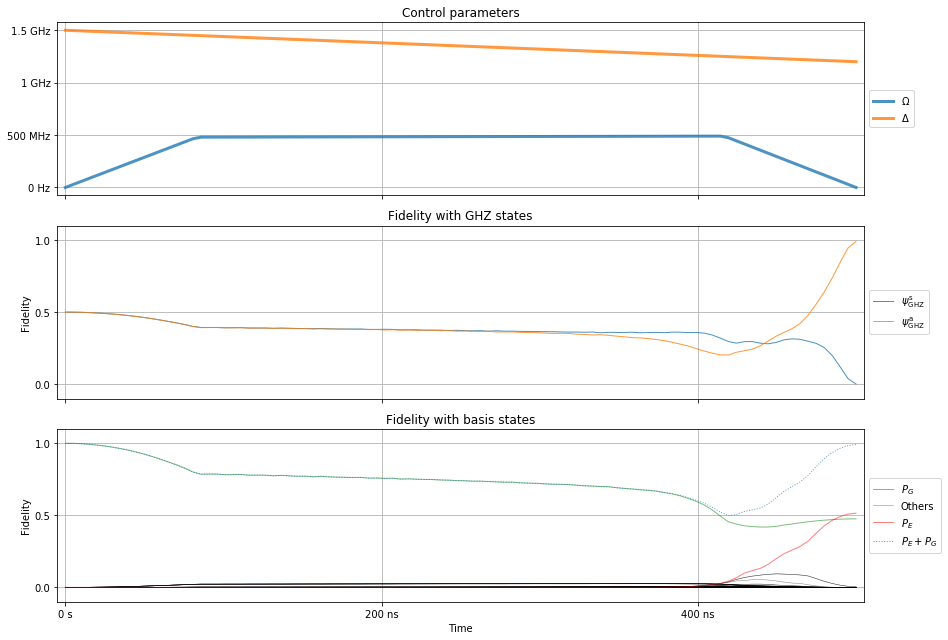

In [12]:
N = 8
t = 0.5e-6
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 6, t * 5 / 6, t], [0, 480e6, 490e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.5e9, 1.2e9]),
    t_list=np.linspace(0, t, 100),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)

In [28]:
t_num = 30
discretised_Omega = np.hstack((
    np.linspace(0, 480e6, t_num / 6),
    np.linspace(480e6, 490e6, t_num * 4 / 6),
    np.linspace(490e6, 0, t_num / 6),
))
discretised_Delta = np.linspace(1.5e9, 1.2e9, t_num)

C:\Users\harry\Anaconda3\envs\urop\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harry\Anaconda3\envs\urop\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
C:\Users\harry\Anaconda3\envs\urop\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


Solved in 3.85s
fidelity with GHZ: 0.1348 (with antisymmetric: 0.8363)
superposition probability: 0.9711 (g: 0.4292, e: 0.5418)



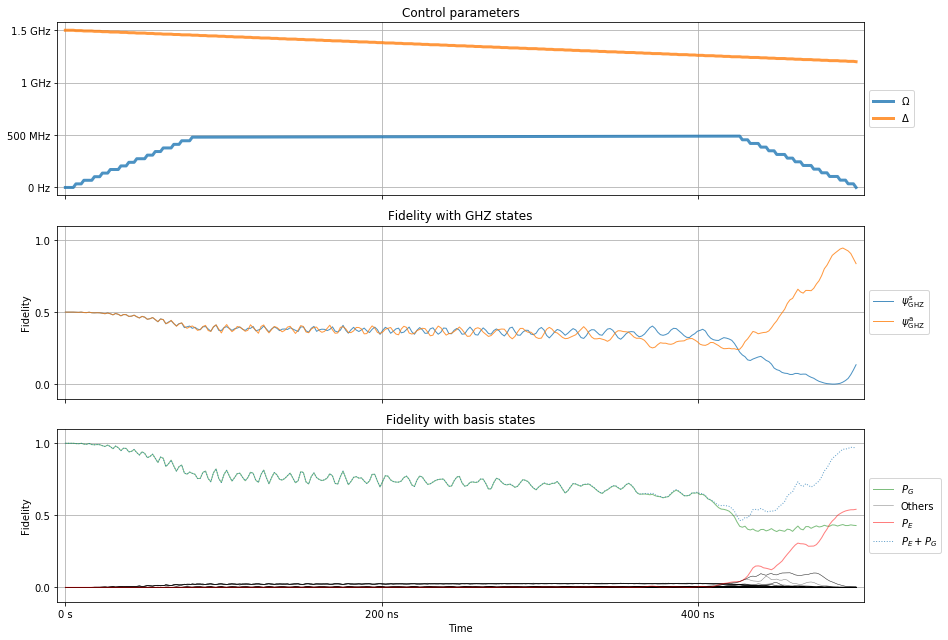

In [29]:
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_interpolation(
        np.linspace(0, t, t_num),
        discretised_Omega
        , "previous"
    ),
    Delta=get_hamiltonian_coeff_interpolation(
        np.linspace(0, t, t_num), 
        np.linspace(1.5e9, 1.2e9, t_num), 
        "previous"
    ),
    t_list=np.linspace(0, t, 300),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)

Solved in 2.04s
fidelity with GHZ: 0.1347 (with antisymmetric: 0.8363)
superposition probability: 0.9711 (g: 0.4292, e: 0.5419)



C:\Users\harry\Documents\Imperial\UROP\code\qubit_system\qubit_system_classes_quimb.py:436: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


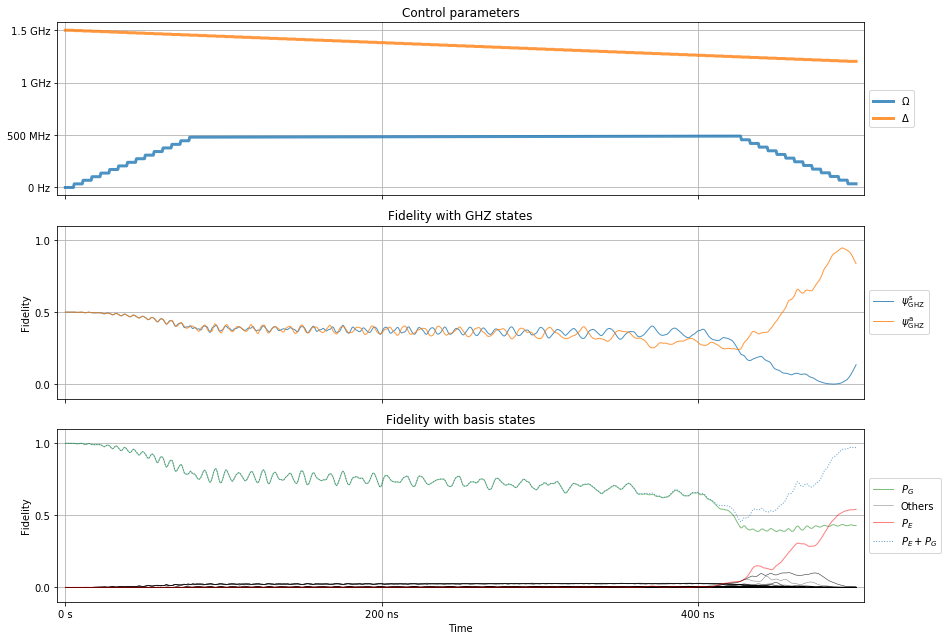

In [30]:
from qubit_system.qubit_system_classes_quimb import EvolvingQubitSystem as EvolvingQubitSystemQ
from qubit_system.utils.ghz_states_quimb import StandardGHZState as StandardGHZStateQ

N = 8
t = 0.5e-6
e_qs = EvolvingQubitSystemQ(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=discretised_Omega[:-1],
    Delta=discretised_Delta[:-1],
    t_list=np.linspace(0, t, t_num),
    ghz_state=StandardGHZStateQ(N),
    solve_points_per_timestep=10
)
solve_and_print_stats(e_qs)